In [90]:
import os
import nltk
import nltk.corpus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.util import bigrams, trigrams, ngrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [2]:
df = pd.read_csv ("train.csv")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         60000 non-null  int64 
 1   comment    60000 non-null  object
 2   subreddit  60000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


(60000, 3)

In [3]:
def clean_text(df):
    
    all_comments = list()
    lines = df["comment"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        text = re.sub(r"nt", "not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        
        tokens = word_tokenize(text)
        
        table = str.maketrans('', '', string.punctuation)
        
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        
        words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        
        all_comments.append(words)
    return all_comments

all_comments = clean_text(df)
all_comments[0:4]

['think prestige poinots not expire ever skins buy available set duration exemple year release another skin vault old one making also limitededition skin also please love god not rerelease skins need grind prestige shop would suck everyone grinded',
 'whats going happen refused asilum appeal',
 'anecdotal evidence anecdotal clearly everyone meanot like people not',
 'look dude due respect music people looks like carti either caught much flak maybe senot polite post inviting discussion instead capitalizing every impactful word post carti']

In [4]:
len(all_comments)

60000

In [5]:
c = all_comments
filtered_sentence = [] 
freq_count_limit = FreqDist()
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

for i in c:
    comment_tokens = word_tokenize(i)
    for words in comment_tokens:
        if words not in stop_words: 
            filtered_sentence.append(words) 
        
            limit_words = lemmatizer.lemmatize(words)
#     for word in root_words:
            freq_count_limit[limit_words.lower()]+=1
freq_count_limit

FreqDist({'like': 8954, 'would': 7132, 'nt': 6837, 'one': 5971, 'people': 5884, 'get': 5839, 'think': 4498, 'time': 4385, 'game': 3900, 'even': 3839, ...})

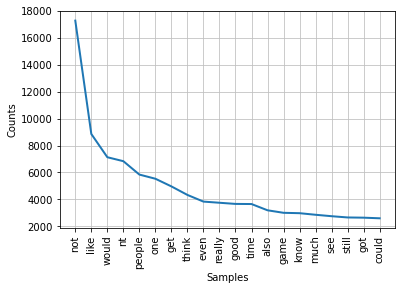

In [65]:
fdist.plot(20,cumulative=False)
plt.show()

In [7]:
freq_count_limit.pop("nt")
freq_count_limit.pop("would")
freq_count_limit.pop("one")
freq_count_limit.pop("get")
freq_count_limit

FreqDist({'like': 8954, 'people': 5884, 'think': 4498, 'time': 4385, 'game': 3900, 'even': 3839, 'really': 3752, 'good': 3700, 'make': 3573, 'know': 3275, ...})

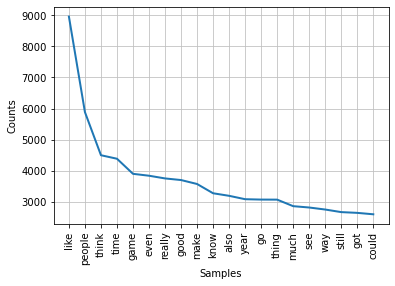

In [64]:
freq_count_limit.plot(20,cumulative=False)
plt.show()

In [8]:
# list(freq_count_limit.items())

In [9]:
sorted_cleaned_words = sorted(freq_count_limit.items(), key=lambda x: x[1], reverse=True)
len(sorted_cleaned_words)

52712

In [174]:
top_1000_words = sorted_cleaned_words[:100]

In [175]:
lists = top_100_words
x, y = zip(*lists)
x=list(x)

In [176]:
# top_100_dummy = pd.get_dummies(x)

In [177]:
# top_100_dummy.shape

In [178]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(x)

In [179]:
text_counts.shape

(52712, 52559)

In [192]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(ngram_range = (1,1), tokenizer = token.tokenize)
text_counts2 = cv.fit_transform(all_comments)

In [193]:
text_counts2.shape

(60000, 57416)

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts2, df['subreddit'], test_size=0.2, random_state=1)

In [195]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.46875


In [16]:
# fdist_top500 = freq_count_limit.most_common(1000) #[-10:]
# fdist_top500

In [17]:
# quotes_biogram = list(nltk.trigrams(freq_count_limit))
# quotes_biogram

In [18]:
# df.groupby('subreddit').describe()

In [19]:
# community_dummies = df['subreddit'].str.get_dummies(sep=' ')
# community_dummies[:]

In [20]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.comment,df., test_size=0.2)

In [21]:
# from sklearn.feature_extraction.text import CountVectorizer
# v = CountVectorizer()
# X_train_count = v.fit_transform(X_train.values)
# X_train_count.toarray()[:20]

In [22]:
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
# model.fit(X_train_count,y_train)

In [23]:
# # noinspection SpellCheckingInspection
# class NaiveBayesClassifier(object):
#     def __init__(self, n_gram=1, printing=False):
#         self.prior = defaultdict(int)
#         self.logprior = {}
#         self.bigdoc = defaultdict(list)
#         self.loglikelihoods = defaultdict(defaultdict)
#         self.V = []
#         self.n = n_gram

#     def compute_prior_and_bigdoc(self, training_set, training_labels):
        
#         for x, y in zip(training_set, training_labels):
#             all_words = x.split(" ")
#             if self.n == 1:
#                 grams = all_words
#             else:
#                 grams = self.words_to_grams(all_words)

#             self.prior[y] += len(grams)
#             self.bigdoc[y].append(x)

#     def compute_vocabulary(self, documents):
#         vocabulary = set()

#         for doc in documents:
#             for word in doc.split(" "):
#                 vocabulary.add(word.lower())

#         return vocabulary

#     def count_word_in_classes(self):
#         counts = {}
#         for c in list(self.bigdoc.keys()):
#             docs = self.bigdoc[c]
#             counts[c] = defaultdict(int)
#             for doc in docs:
#                 words = doc.split(" ")
#                 for word in words:
#                     counts[c][word] += 1

#         return counts

#     def train(self, training_set, training_labels, alpha=1):
#         # Get number of documents
#         N_doc = len(training_set)

#         # Get vocabulary used in training set
#         self.V = self.compute_vocabulary(training_set)

#         # Create bigdoc
#         for x, y in zip(training_set, training_labels):
#             self.bigdoc[y].append(x)

#         # Get set of all classes
#         all_classes = set(training_labels)

#         # Compute a dictionary with all word counts for each class
#         self.word_count = self.count_word_in_classes()

#         # For each class
#         for c in all_classes:
#             # Get number of documents for that class
#             N_c = float(sum(training_labels == c))

#             # Compute logprior for class
#             self.logprior[c] = np.log(N_c / N_doc)

#             # Calculate the sum of counts of words in current class
#             total_count = 0
#             for word in self.V:
#                 total_count += self.word_count[c][word]

#             # For every word, get the count and compute the log-likelihood for this class
#             for word in self.V:
#                 count = self.word_count[c][word]
#                 self.loglikelihoods[c][word] = np.log((count + alpha) / (total_count + alpha * len(self.V)))

#     def predict(self, test_doc):
#         sums = {
#             0: 0,
#             1: 0,
#         }
#         for c in self.bigdoc.keys():
#             sums[c] = self.logprior[c]
#             words = test_doc.split(" ")
#             for word in words:
#                if word in self.V:
#                    sums[c] += self.loglikelihoods[c][word]

#         return sums

In [24]:
# NBclassifier = NaiveBayesClassifier(n_gram=1)
# NBclassifier.train(X_train, y_train)

In [25]:
# result = NBclassifier.predict(test)
# print(np.exp(result))